## SIR model in C++ using Boost odeint

In [1]:
%%writefile sir.cpp
#include <iostream>
#include <boost/array.hpp>

#include <boost/numeric/odeint.hpp>

using namespace std;
using namespace boost::numeric::odeint;

const double b = 0.1;
const double g = 0.05;

typedef boost::array< double , 3 > state_type;

void sir( const state_type &x , state_type &dxdt , double t )
{
    dxdt[0] = -b * x[0] * x[1];
    dxdt[1] = b * x[0] * x[1] - g * x[1];
    dxdt[2] = g * x[1];
}

void write_sir(const state_type &x , const double t )
{
    cout << t << ' ' << x[0] << ' ' << x[1] << ' ' << x[2] << endl;
}

int main(int argc, char **argv)
{
    state_type x = { 0.99 , 0.01 , 0.0 }; // initial conditions
    integrate( sir , x , 0.0 , 200.0 , 0.1 , write_sir );
}

Writing sir.cpp


We compile the code first.

In [2]:
!g++ -O3 sir.cpp -o sir

We run the file and redirect the output to a file

In [3]:
!./sir > sir_cpp.out

### Visualisation

We can graph the results in the output file e.g. using Python and Matplotlib.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [5]:
sir_out = pd.read_csv("sir_cpp.out",sep=" ",header=None,names=["t","S","I","R"],index_col=False)

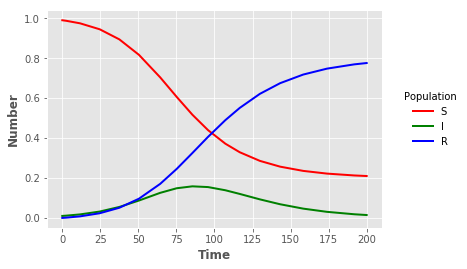

In [6]:
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)